# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [11]:
from zipfile import ZipFile

from PIL import Image, ImageDraw, ImageOps
import pytesseract
import cv2 as cv
import numpy as np
import random
import math
from datetime import datetime 

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!

def get_images_in_zip(zip_file_path):
    
    with ZipFile(zip_file_path, 'r') as zip_file:
        file_list = zip_file.infolist()
        # print(file_list)
        for f in file_list:
            with zip_file.open(f.filename, 'r') as img_file:                
                img = Image.open(img_file)
                img_dict[f.filename] = {'image': img.copy()}


def get_text_from_images():
    
    for img_name in img_dict.keys():
        print('processing text in', img_name)
        img = img_dict[img_name]['image'].convert("L") # using grayscale for better detection

        text = pytesseract.image_to_string(img)
        img_dict[img_name]['text'] = text
        

def get_faces_in_image():
    
    for img_name in img_dict.keys():
        print('processing faces in', img_name)
        # load the classifiers
        face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')
        eye_cascade = cv.CascadeClassifier('readonly/haarcascade_eye.xml')

        pil_image = img_dict[img_name]['image']
        opencvImage = cv.cvtColor(np.array(pil_image), cv.COLOR_RGB2GRAY) # convert to grayscale

        faces = face_cascade.detectMultiScale(opencvImage, 1.35)
        
        if len(faces) > 0:
            img_dict[img_name]['faces'] = faces.tolist()
        else:
            img_dict[img_name]['faces'] = ()
            

def search_images(search_string):
    
    result_images = []
    # for each image in dict, check if 'text' value contains search_string
    # if search_string found, add img_name (key) to result_images list 
    # return the list 
    for img_name in img_dict.keys():
        if search_string in img_dict[img_name]['text']:
            result_images.append(img_name)
    
    return result_images


def get_face_images(img_name):
    
    face_images = []
    source_image = img_dict[img_name]['image']
    face_bounds = img_dict[img_name]['faces']
    
    for x,y,w,h in face_bounds:
        cropped_img = source_image.crop((x, y, x + w, y + h))
        face_images.append(cropped_img)
    
    return face_images


def build_contact_sheet(img_name):

    faces = get_face_images(img_name)
    first_image = faces[0]
    
    lines = math.ceil(len(faces) / 5.0)
    
    thumbnail_width = 100
    thumbnail_height = 100
    
    contact_sheet = Image.new(first_image.mode, (thumbnail_width * 5, thumbnail_height * lines))
    
    x = 0
    y = 0

    for img in faces:
        
        if (img.width > thumbnail_width):
            img = ImageOps.fit(img, (thumbnail_width, thumbnail_height), method = 0, 
                       bleed = 0.0, centering =(0.5, 0.5)) 
        
        # Lets paste the current image into the contact sheet
        contact_sheet.paste(img, (x, y))
        # Now we update our X position. If it is going to be the width of the image, then we set it to 0
        # and update Y as well to point to the next "line" of the contact sheet.
        
        if x + thumbnail_width == contact_sheet.width:
            x = 0
            y = y + thumbnail_height
        else:
            x = x + thumbnail_width
            
    return contact_sheet


def show_results(search_term):

    images_found = search_images(term)

    if len(images_found) > 0:

        for img_name in images_found:
            print('Results found in file', img_name)
            faces_found = img_dict[img_name]['faces']
            if len(faces_found) > 0:
                # Display contact sheet of faces
                face_contact_sheet = build_contact_sheet(img_name)
                display(face_contact_sheet)

            else:
                print('But there were no faces in that file!\n')



Search term: Christopher

Zip file: readonly/small_img.zip
Results found in file a-0.png


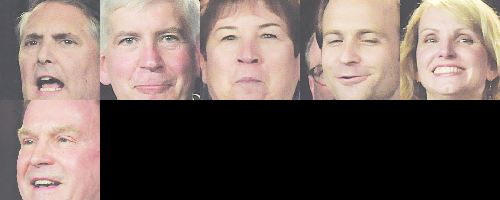

Results found in file a-3.png


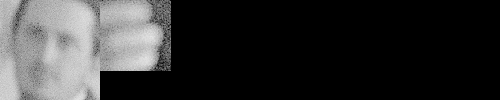

In [6]:
# test search for Christopher in small_zip
term = 'Christopher'
print('Search term:', term + '\n')
print('Zip file:', images_zip_path)

show_results(term)


Search term: Mark

Zip file: readonly/small_img.zip
Results found in file a-0.png


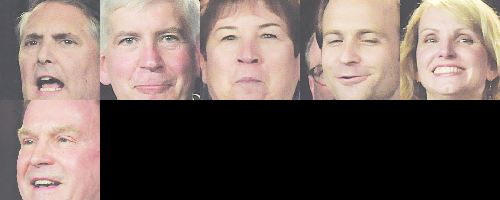

Results found in file a-1.png


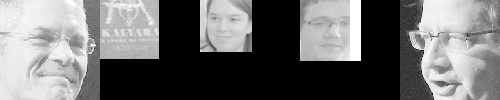

Results found in file a-2.png


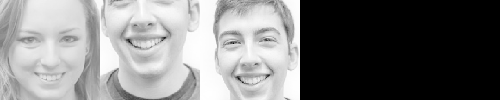

Results found in file a-3.png


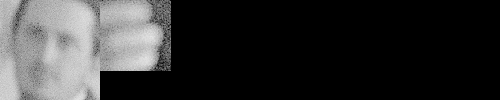

In [5]:
# test search for Mark in small_zip
term = 'Mark'
print('Search term:', term + '\n')
print('Zip file:', images_zip_path)

show_results(term)


In [12]:
# process large file
startTime = datetime.now()

images_zip_path = 'readonly/images.zip'
# img_dict = {}

# get_images_in_zip(images_zip_path)
# get_text_from_images()
get_faces_in_image()

# print(img_dict.keys())
print('Done!')
print('Time elapsed:', datetime.now() - startTime)

processing faces in a-0.png
processing faces in a-1.png
processing faces in a-10.png
processing faces in a-11.png
processing faces in a-12.png
processing faces in a-13.png
processing faces in a-2.png
processing faces in a-3.png
processing faces in a-4.png
processing faces in a-5.png
processing faces in a-6.png
processing faces in a-7.png
processing faces in a-8.png
processing faces in a-9.png
Done!
Time elapsed: 0:03:17.630430


Search term: Mark
Zip file: readonly/images.zip

Results found in file a-0.png


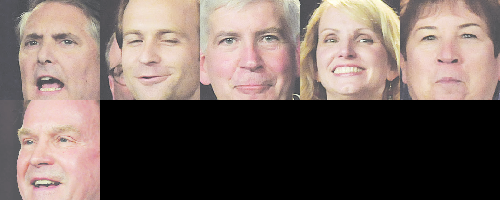

Results found in file a-1.png


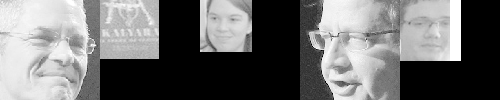

Results found in file a-10.png
But there were no faces in that file!

Results found in file a-13.png


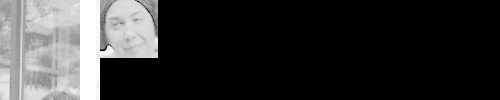

Results found in file a-2.png


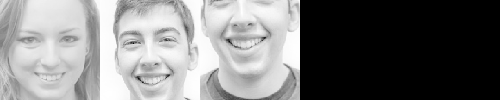

Results found in file a-3.png


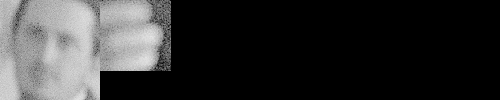

Results found in file a-8.png


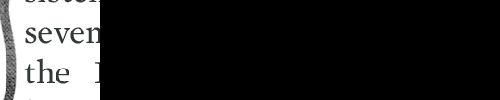

In [15]:
# test search for Mark in large zip
term = 'Mark'
print('Search term:', term)
print('Zip file:', images_zip_path + '\n')

show_results(term)


Search term: Christopher
Zip file: readonly/images.zip

Results found in file a-0.png


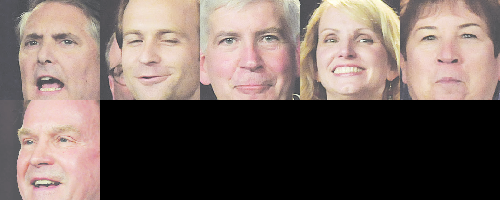

Results found in file a-3.png


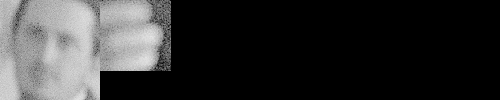

In [16]:
# test search for Christopher in large zip
term = 'Christopher'
print('Search term:', term)
print('Zip file:', images_zip_path + '\n')

show_results(term)